In [47]:

from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
import matplotlib.pyplot as plt

In [7]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [11]:
def createDataFrame (dir):
    imagePaths = []
    labels = []
    for label in os.listdir(dir):
        # Skip hidden files
        if not label.startswith('.'):
            for imageName in os.listdir(os.path.join(dir, label)):
                imagePaths.append(os.path.join(dir, label, imageName))
                labels.append(label)
            print('Finished loading images from {}'.format(label))
    return imagePaths, labels

In [12]:
train = pd.DataFrame()
train['image'], train['label'] = createDataFrame(TRAIN_DIR)

Finished loading images from happy
Finished loading images from sad
Finished loading images from fear
Finished loading images from surprise
Finished loading images from neutral
Finished loading images from angry
Finished loading images from disgust


In [15]:
test = pd.DataFrame()
test['image'], test['label'] = createDataFrame(TEST_DIR)

Finished loading images from happy
Finished loading images from sad
Finished loading images from fear
Finished loading images from surprise
Finished loading images from neutral
Finished loading images from angry
Finished loading images from disgust


In [20]:
def extractFeatures(images):
    print('Extracting features...')
    features = []
    for images in tqdm(images):
        img = load_img(images, color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [21]:
trainFeatures = extractFeatures(train['image'])

Extracting features...


  0%|          | 0/28821 [00:00<?, ?it/s]

In [22]:
testFeatures = extractFeatures(test['image'])

Extracting features...


  0%|          | 0/7066 [00:00<?, ?it/s]

In [23]:
X_train = trainFeatures/255.0
X_test = testFeatures/255.0

In [27]:
LabelEncoder().fit(train['label'])

LabelEncoder()

In [29]:
Y_train = LabelEncoder().fit_transform(train['label'])
Y_test = LabelEncoder().fit_transform(test['label'])

In [30]:
Y_train = to_categorical(Y_train, num_classes=7)
Y_test = to_categorical(Y_test, num_classes=7)

In [31]:
model = Sequential()

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(X_train, Y_train, epochs=100, batch_size=128, validation_data=(X_test, Y_test))

Epoch 1/100
226/226 [==============================] - 271s 1s/step - loss: 1.8243 - accuracy: 0.2437 - val_loss: 1.8095 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 236s 1s/step - loss: 1.8073 - accuracy: 0.2513 - val_loss: 1.7781 - val_accuracy: 0.2598
Epoch 3/100
226/226 [==============================] - 237s 1s/step - loss: 1.7499 - accuracy: 0.2784 - val_loss: 1.6752 - val_accuracy: 0.3283
Epoch 4/100
226/226 [==============================] - 257s 1s/step - loss: 1.6360 - accuracy: 0.3504 - val_loss: 1.5213 - val_accuracy: 0.4093
Epoch 5/100
226/226 [==============================] - 258s 1s/step - loss: 1.5244 - accuracy: 0.4081 - val_loss: 1.3842 - val_accuracy: 0.4660
Epoch 6/100
226/226 [==============================] - 245s 1s/step - loss: 1.4639 - accuracy: 0.4300 - val_loss: 1.3779 - val_accuracy: 0.4670
Epoch 7/100
226/226 [==============================] - 252s 1s/step - loss: 1.4146 - accuracy: 0.4560 - val_loss: 1.2981 - val_accuracy:

In [41]:
# saving model as .keras file
model.save("emotionCheck.keras")

In [42]:
loaded_model = load_model("emotionCheck.keras")

In [37]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [43]:
def ef(image):
    img = load_img(image, color_mode="grayscale")
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [46]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)

# Using the loaded model for prediction
pred = loaded_model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)

original image is of sad
1/1 [==============================] - 0s 19ms/step
model prediction is sad


original image is of angry
1/1 [==============================] - 0s 24ms/step
model prediction is  angry


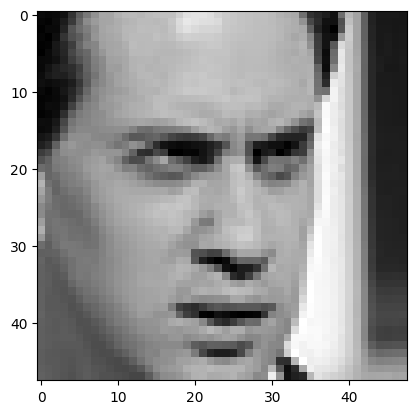

In [53]:
image = 'images/test/angry/966.jpg'
print("original image is of angry")
img = ef(image)
pred = loaded_model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')